## **Presentación**

### **Comisión 1**

**Integrantes:**
*   Gustavo Alberto Casado (C-7296/6)
*   Gustavo Julián Fontana
*   Sofía Brizuela Cipolletti

# Problema

**Enunciado**

En base a los datos proporcionados por la pagina de Airbnb, proyecto que busca mostrar el impacto negativo de los alquileres a corto plazo en las comunidades residenciales, elegir una ciudad de las allí dadas  y elaborar una pregunta por integrante de manera tal, que se puedan visibilizar los datos que responden a ellas, si es posible.

En base a los datos proporcionados por el sitio http://insideairbnb.com/, referidos a ofertas de lugares para alojarse en forma temporaria, plantearse preguntas acerca de una ciudad en particular y luego con el análisis de los datos llegar a responder esas preguntas.

Ciudad elegida: **Barcelona**

**Preguntas:**

1. ¿Cuáles serían los distritos más baratos y más caros?
2. ¿Cuál es la cantidad de hosts por distrito según el tipo de vivienda?
3. ¿Cuáles son los distritos mas demandados en base a sus reseñas?



# Estructura de Datos

***Para resolver la pregunta 1:***
1. Utilizaremos un diccionario cuya clave es el distrito y le asignamos una lista con todos los precios por cama obtenidos del archivo de alquileres.
2. Se descartan los datos que tengan algun campos vacio: cantidad de camas o precio.
3. Luego se hace una limpieza de datos usando la media y el desvío estándar de los precios obtenidos para quitar de la muestra los valores extremos que puedan deberse a errores de carga de datos.
4. Con estos datos depurados se obtiene el promedio por distrito.

# Carga de datos

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt

Funciones para la pregunta número 1:

In [27]:
#@title: obtener_minimo valor de un diccionario con su clave
def obtener_minimo(diccionario):
  minimo_valor = None
  for leyenda,valor in diccionario.items():
    if minimo_valor is None:
      minimo_valor = valor
      minimo_leyenda = leyenda
    elif valor < minimo_valor:
      minimo_valor = valor
      minimo_leyenda = leyenda
  return minimo_leyenda, minimo_valor

#@title: obtener_maximo valor de un diccionario con su clave
def obtener_maximo(diccionario):
  maximo_valor = None
  for leyenda,valor in diccionario.items():
    if maximo_valor is None:
      maximo_valor = valor
      maximo_leyenda = leyenda
    elif valor > maximo_valor:
      maximo_valor = valor
      maximo_leyenda = leyenda
  return maximo_leyenda, maximo_valor

def cargar_datos_por_room_type(filter_room_type):
#("Entire home/apt")
#("Private room")
#("Hotel room")
#("Shared room")
  print("")
  if filter_room_type:
    print("Filtro por:",filter_room_type)
  
  with open('listings.csv', newline='') as File:
    reader = csv.reader(File, delimiter=',')
    descartados = 0
    agrupamiento={}
    for num_row, row in enumerate(reader):
      
      if(num_row>0):#salto el encabezado        
        room_type = row[32] #room_type
        if filter_room_type:
          if room_type!=filter_room_type:
            continue
        
        distrito = row[28] #distrito o neighbourhood_group_cleansed
        precio = row[39][1:].replace(',','') #39 price
        camas = row[37] #beds
        if (precio!='' and camas!=''): #descarto la fila si algun dato esta vacio
          ratio_price_bed = float(precio)/float(camas)    
          #print('price/bed:', ratio_price_bed)
          if (distrito in agrupamiento):
              agrupamiento[distrito].append(ratio_price_bed)
          else:              
              agrupamiento[distrito] = [ratio_price_bed]
        else:
          descartados += 1
  print("")
  print("Cantidad total de datos: ", num_row)
  print("Cantidad de datos descartados: ", descartados)
  print("")
  return agrupamiento

def obtener_promedio(agrupamiento, cota=1):
  agrupamiento_promedio = {}
  for clave, valores in agrupamiento.items():
    media = np.mean(valores)
    desvio = np.std(valores) * cota
    agrupamiento_depurado = [x for x in valores if abs(x - media) < desvio]
    minimo = min(agrupamiento_depurado)
    maximo = max(agrupamiento_depurado)
    promedio = np.mean(agrupamiento_depurado)
    cantidad = len(agrupamiento_depurado)
    agrupamiento_promedio[clave] = promedio
    print("Cantidad datos por distrito", clave,": ", cantidad, "- Min,Avg,Max:", round(minimo),",",round(promedio),",",round(maximo))
  return agrupamiento_promedio


def graficar_barras(datos):
    plt.figure(figsize = (15,6))
    plt.xticks(rotation = 90, fontsize=15);
    plt.yticks(fontsize=20);
    plt.xlabel('Distrito',fontsize=10)
    plt.ylabel('Precio medio por cama',fontsize=15)
    plt.title('Precio medio por cama por distrito en Barcelona',fontsize=20);
    plt.savefig('imagen.png', bbox_inches = 'tight')
    plt.bar(datos.keys(), datos.values())
    plt.show()


def generar_respuesta1():
  agrupamiento = cargar_datos_por_room_type(None)
  agrupamiento_avg = obtener_promedio(agrupamiento,2)
  print("")
  leyenda, minimo = obtener_minimo(agrupamiento_avg)
  print("El distrito más barato es:", leyenda, "con un precio promedio por cama de: $", round(minimo))
  leyenda, maximo = obtener_maximo(agrupamiento_avg)
  print("El distrito más caro es:", leyenda, "con un precio promedio por cama de: $", round(maximo))
  print("")
  graficar_barras(agrupamiento_avg)



Funciones para la pregunta número 2

Funciones para la pregunta número 3

In [7]:
from matplotlib.rcsetup import validate_any
def carga (archivo_lectura):
  """La función carga relaciona las posiciónes distrito y reviews totales de la 
  fila del encabezado del documento, para obtener el total de reviews por cada
  distrito de Barcelona"""
  reviews_por_distrito = {}
  with open(archivo_lectura) as File:
    reader = csv.reader(File, delimiter=',')
    for row in reader:
        if row[55] == 'number_of_reviews':
            continue
        else:
            r = int(row[55]) #55 ES EL INDICE DE number_of_reviews 
            distrito = row[28] #28 ES EL INDICE neighbourhood_group_cleansed
            if distrito in reviews_por_distrito.keys():
                reviews_por_distrito[distrito].append(r)
            else:
                reviews_por_distrito[distrito] =[r]            
    return reviews_por_distrito

def pop (diccionario):
  """La función pop retorna el total de reviews en cada distrito en base al
  diccionario ingresado"""
  diccionario = {k: sum (v) for k, v in diccionario.items()} 
  return diccionario

def dis_mas_demandado ():
  """Muestra los distritos más demandados en Barcelona"""
  print ("Los distritos con mayor demanda en Barcelona: ", pop (carga('listings.csv'))) 

def grafico_torta(key,value):
  """La función realiza un gráfico de torta con los parámetros proporcionados"""
  explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
  colors = ( "orange", "coral", "brown", "teal", "peachpuff",
          "khaki", "sienna", "beige", "mediumaquamarine", "tomato")
  wp = { 'linewidth' : 1.5, 'edgecolor' : "silver" }
  def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)
  fig, ax = plt.subplots(figsize =(10, 10))
  wedges, texts, autotexts = ax.pie(value,
                                  autopct = lambda pct: func(pct, value),
                                  explode = explode,
                                  labels = key,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 0,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black", size = 13.5, weight ="bold"))
  ax.legend(wedges, key,
          title ="Distritos",
          loc ="upper center", 
          bbox_to_anchor =(1, 0, 0.1, 1))
  plt.setp(autotexts, size = 12, weight ="bold")
  ax.set_title("Distritos más demandados", size = 30, loc = "center", weight ="bold")
  plt.show() 

def datos_grafico ():
  """La función crea listas de llaves y valores para usarse como variables
  para graficar"""
  lista_y = []
  lista_x = []
  for k in carga('listings.csv').keys():
    lista_x.append(k)
  for v in carga('listings.csv').values():  
    lista_y.append(sum (v)) 
  return lista_x , lista_y

def graficar ():
  """Función para graficar"""
  a , b = datos_grafico ()
  grafico_torta (a,b)


# 1. ¿Cuáles serían los distritos más baratos y más caros? 


* Variable comparativa: precio / cantidad de camas por cada alquiler
* Luego obtener el promedio de ese valor por cada distrito



Cantidad total de datos:  16042
Cantidad de datos descartados:  381

Cantidad datos por distrito Eixample :  5422 - Min,Avg,Max: 1 , 55 , 629
Cantidad datos por distrito Sant Martí :  1504 - Min,Avg,Max: 2 , 47 , 600
Cantidad datos por distrito Gràcia :  1425 - Min,Avg,Max: 2 , 49 , 400
Cantidad datos por distrito Ciutat Vella :  3330 - Min,Avg,Max: 2 , 48 , 302
Cantidad datos por distrito Sants-Montjuïc :  1856 - Min,Avg,Max: 1 , 46 , 550
Cantidad datos por distrito Sarrià-Sant Gervasi :  621 - Min,Avg,Max: 5 , 50 , 760
Cantidad datos por distrito Les Corts :  487 - Min,Avg,Max: 2 , 50 , 1000
Cantidad datos por distrito Horta-Guinardó :  470 - Min,Avg,Max: 4 , 34 , 158
Cantidad datos por distrito Sant Andreu :  254 - Min,Avg,Max: 6 , 32 , 300
Cantidad datos por distrito Nou Barris :  199 - Min,Avg,Max: 6 , 34 , 450

El distrito más barato es: Sant Andreu con un precio promedio por cama de: $ 32
El distrito más caro es: Eixample con un precio promedio por cama de: $ 55



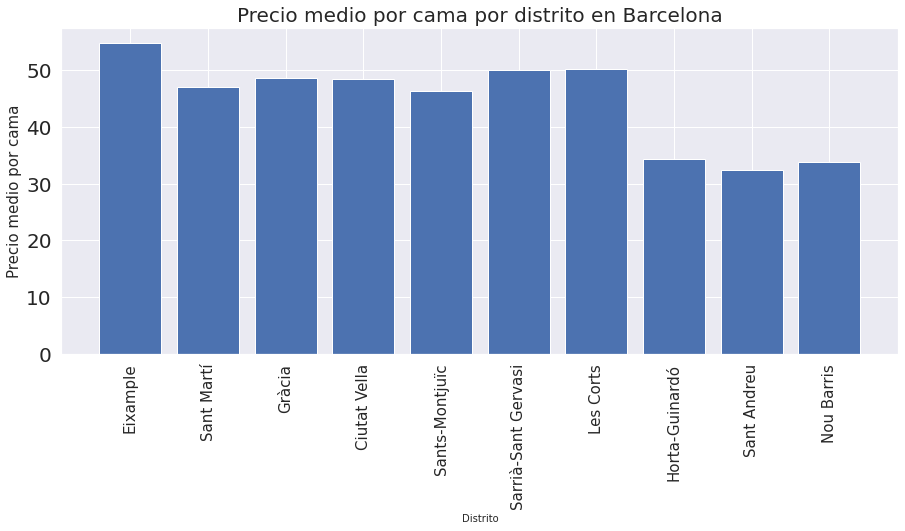

In [28]:
generar_respuesta1()

# 2. ¿Cuál es la cantidad de hosts por distrito según el tipo de vivienda?

# 3. ¿Cuáles son los distritos mas demandados en base a sus reseñas?

In [8]:
dis_mas_demandado ()

Los distritos con mayor demanda en Barcelona:  {'Eixample': 241503, 'Sant Martí': 57373, 'Gràcia': 59941, 'Ciutat Vella': 98839, 'Sants-Montjuïc': 84550, 'Sarrià-Sant Gervasi': 16274, 'Les Corts': 18082, 'Horta-Guinardó': 15106, 'Sant Andreu': 5095, 'Nou Barris': 3974}


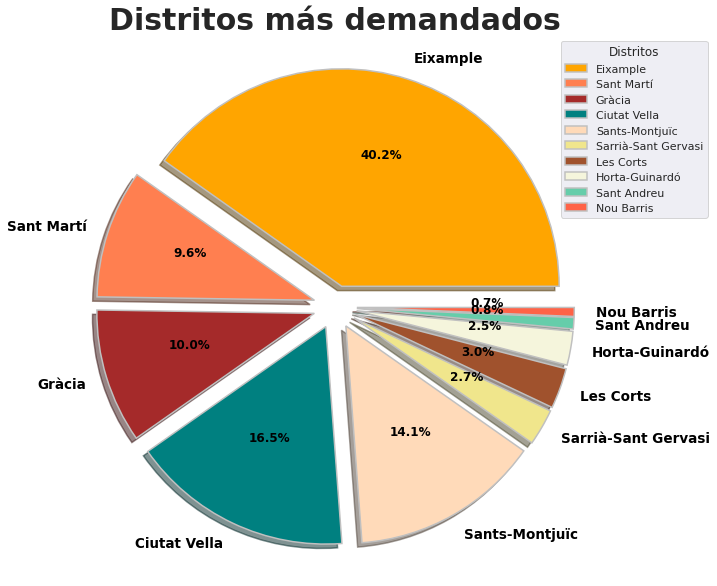

In [9]:
graficar ()

# Conclusiones finales




*   El distrito más caro: Eixample es tambien el mas demandado y el distrito más barato: Sant Andreu es uno de los menos demandados.


